In [199]:
import mesa
import mesa_geo as mg
import geopandas as gpd
import matplotlib.pyplot as plt
import random

from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from shapely.geometry import Polygon, MultiPolygon

In [200]:
import requests

# buurten ex water (approx 517)
url = "https://maps.amsterdam.nl/open_geodata/geojson_lnglat.php?KAARTLAAG=INDELING_BUURT_EXWATER&THEMA=gebiedsindeling"
ID = "Buurt"

# # wijken ex water (approx 110)
# url = "https://maps.amsterdam.nl/open_geodata/geojson_lnglat.php?KAARTLAAG=INDELING_WIJK_EXWATER&THEMA=gebiedsindeling"
# ID = "Wijk"

# # gebieden ex water (approx 25)
# url = "https://maps.amsterdam.nl/open_geodata/geojson_lnglat.php?KAARTLAAG=INDELING_GEBIED_EXWATER&THEMA=gebiedsindeling"
# ID = "Gebied"

# # stadsdelen ex water (approx 9)
# url = "https://maps.amsterdam.nl/open_geodata/geojson_lnglat.php?KAARTLAAG=INDELING_STADSDEEL_EXWATER&THEMA=gebiedsindeling"
# ID = "Stadsdeel"

# # woningswaardes 2022
price_url = "https://maps.amsterdam.nl/open_geodata/geojson_lnglat.php?KAARTLAAG=WONINGWAARDE_2022&THEMA=woningwaarde"
price_ID = "LABEL"

r = requests.get(url)
geojson_ams = r.json()

r_price = requests.get(price_url)
geojson_ams_price = r_price.json()

In [201]:
len(geojson_ams['features'])


517

In [202]:
# Function to create a GeoDataFrame from the given dataset
def create_gdf(data):
    geometries = []
    properties = []

    for feature in data:
        geom_type = feature['geometry']['type']
        coords = feature['geometry']['coordinates']
        
        if geom_type == 'Polygon':
            # Create a Polygon
            polygon = Polygon(shell=coords[0], holes=coords[1:] if len(coords) > 1 else None)
        elif geom_type == 'MultiPolygon':
            # Create a MultiPolygon
            polygons = []
            for polygon_coords in coords:
                polygon = Polygon(shell=polygon_coords[0], holes=polygon_coords[1:] if len(polygon_coords) > 1 else None)
                polygons.append(polygon)
            polygon = MultiPolygon(polygons)
        
        geometries.append(polygon)
        properties.append(feature['properties'])

    gdf = gpd.GeoDataFrame(properties, geometry=geometries)
    return gdf

data1 = geojson_ams['features']
data2 = geojson_ams_price['features']



# Create GeoDataFrames
gdf1 = create_gdf(data1)
gdf2 = create_gdf(data2)

# Perform a spatial join to find the nearest geometries
nearest_gdf = gpd.sjoin_nearest(gdf1, gdf2, how="left", distance_col="distance")

# Update the properties of the first dataset with the matched LABEL values
for index, row in nearest_gdf.iterrows():
    if 'LABEL' in row:
        data1[index]['properties']['LABEL'] = row['LABEL']

print(len(nearest_gdf))
geojson_ams['features'] = data1

1565


In [203]:
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon

# Function to create a GeoDataFrame from the given dataset
def create_gdf(data):
    geometries = []
    properties = []

    for feature in data:
        geom_type = feature['geometry']['type']
        coords = feature['geometry']['coordinates']
        
        if geom_type == 'Polygon':
            # Create a Polygon
            polygon = Polygon(shell=coords[0], holes=coords[1:] if len(coords) > 1 else None)
        elif geom_type == 'MultiPolygon':
            # Create a MultiPolygon
            polygons = []
            for polygon_coords in coords:
                polygon = Polygon(shell=polygon_coords[0], holes=polygon_coords[1:] if len(polygon_coords) > 1 else None)
                polygons.append(polygon)
            polygon = MultiPolygon(polygons)
        
        geometries.append(polygon)
        properties.append(feature['properties'])

    gdf = gpd.GeoDataFrame(properties, geometry=geometries)
    return gdf

# Assuming geojson_ams and geojson_ams_price are your datasets
data1 = geojson_ams['features']
data2 = geojson_ams_price['features']

# Create GeoDataFrames
gdf1 = create_gdf(data1)
gdf2 = create_gdf(data2)

# Perform a spatial join to find the nearest geometries
nearest_gdf = gpd.sjoin_nearest(gdf1, gdf2, how="left", distance_col="distance")

# Update the properties of the first dataset with the matched LABEL values
for index, row in nearest_gdf.iterrows():
    if 'LABEL' in row:
        data1[index]['properties']['LABEL'] = row['LABEL']

# Optionally, convert data1 back to a GeoDataFrame if needed
updated_gdf1 = create_gdf(data1)

# Print length of nearest_gdf for verification
print(len(nearest_gdf))

# Assuming you want to update the original geojson_ams['features'] with data1
geojson_ams['features'] = data1


1565


In [204]:
class State(mg.GeoAgent):
    def __init__(self, unique_id, model, geometry, crs):
        super().__init__(unique_id, model, geometry, crs)


class GeoModel(mesa.Model):
    def __init__(self):
        self.space = mg.GeoSpace()

        ac = mg.AgentCreator(agent_class=State, model=self)
        agents = ac.from_GeoJSON(GeoJSON=geojson_ams, unique_id=ID)
        self.space.add_agents(agents)

In [205]:
m = GeoModel()

/Users/jennadevries/anaconda3/lib/python3.10/site-packages/mesa_geo/geospace.py:172: UserWarning: Converting State from crs EPSG:4326 to the crs of GeoSpace - EPSG:3857. Please check your crs settings if this is unintended, or set `GeoSpace.warn_crs_conversion` to `False` to suppress this warning message.
  self._check_agent(agent)


/var/folders/f8/8_w9799j2wlfkyxvlcmd3z180000gn/T/ipykernel_25284/3471976140.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')  # You can choose any colormap here
/var/folders/f8/8_w9799j2wlfkyxvlcmd3z180000gn/T/ipykernel_25284/3471976140.py:43: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm, fraction=0.03)  # Adjust fraction as needed (0.03 is just an example)


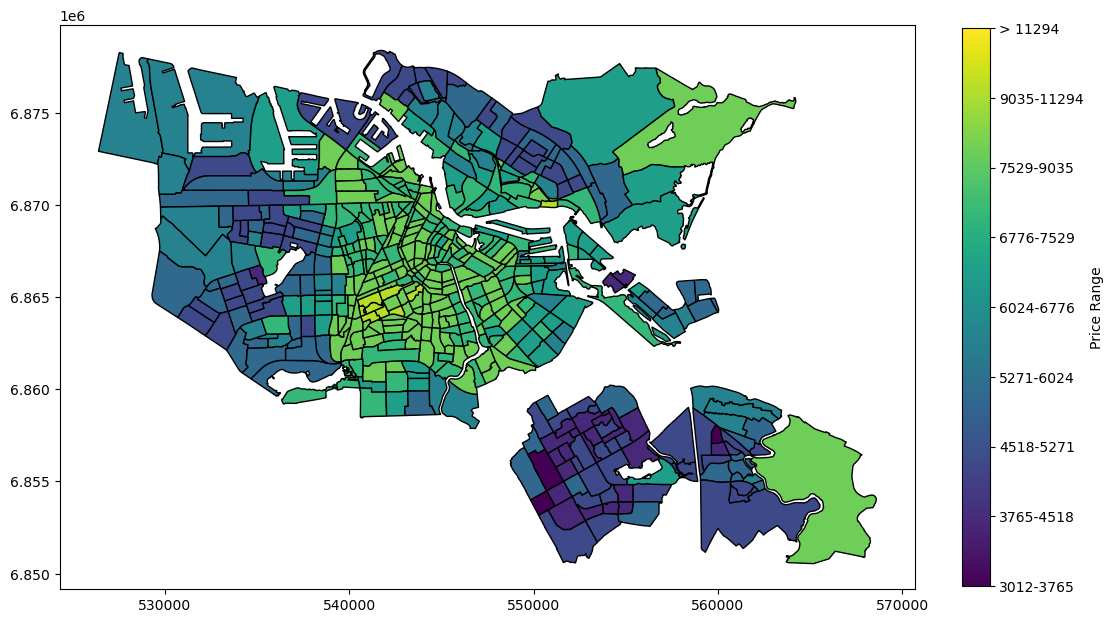

In [206]:
# Assuming `m.space.agents` contains the agents
geometries = []
agent_labels = []
price_ranges = []  # Assuming each agent has a price range string

for agent in m.space.agents:
    geometries.append(agent.geometry)
    price_ranges.append(agent.LABEL)

# Create a GeoDataFrame from the geometries
gdf = gpd.GeoDataFrame(geometry=geometries)
gdf['price_range'] = price_ranges

# Define a colormap that represents a gradient from cheap to expensive
cmap = plt.cm.get_cmap('viridis')  # You can choose any colormap here

# Define the range of price ranges in the order you want to assign colors
price_range_order = [
    '3012-3765',
    '3765-4518',
    '4518-5271',
    '5271-6024',
    '6024-6776',
    '6776-7529',
    '7529-9035',
    '9035-11294',
    '> 11294'
]

# Create a dictionary mapping each price range to a color using the colormap
colors = {price_range: cmap(idx / len(price_range_order)) for idx, price_range in enumerate(price_range_order)}

# Assign colors to each agent based on their price range
gdf['color'] = gdf['price_range'].map(colors.get)

# Plot the geometries with the specified colors
fig, ax = plt.subplots(figsize=(12, 10)) 
gdf.plot(ax=ax, edgecolor='black', color=gdf['color'])

# Add colorbar with specified fraction size
sm = ScalarMappable(cmap=cmap, norm=Normalize(vmin=0, vmax=len(price_range_order) - 1))
sm.set_array([])  # You need to set an empty array for the scalar mappable
cbar = fig.colorbar(sm, fraction=0.03)  # Adjust fraction as needed (0.03 is just an example)
cbar.set_ticks(range(len(price_range_order)))
cbar.set_ticklabels(price_range_order)
cbar.set_label('Price Range')


# Show the plot
plt.show()
